In [11]:
import cv2
import numpy as np 
import argparse
from matplotlib import pyplot as plt

In [12]:
ap = argparse.ArgumentParser()
ap.add_argument('-i', '--image', required=True, help = 'Path to input image')
ap.add_argument('-c', '--config', required=True, help = 'Path to yolo config files')
ap.add_argument('-w', '--weights', required=True, help = "Path to weigth files")
ap.add_argument('-c1', '--classes', required=True, help = "path to text file containing classes")
# args = ap.parse_args()

_StoreAction(option_strings=['-c1', '--classes'], dest='classes', nargs=None, const=None, default=None, type=None, choices=None, help='path to text file containing classes', metavar=None)

In [13]:
def get_output_layers(net):
    
    layer_names = net.getLayerNames()
    
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

    return output_layers


def draw_prediction(img, class_id, confidence, x, y, x_plus_w, y_plus_h):

    label = str(classes[class_id])

    color = COLORS[class_id]

    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)

    cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)


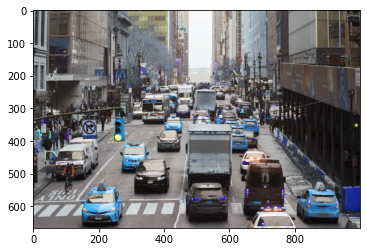

In [14]:
image = cv2.imread(r'/home/sachin269/Downloads/DEEP LEARNING WITH COMPUTER VISION-20220118T071344Z-001/DEEP LEARNING WITH COMPUTER VISION/CONTENT/Copy of YOLO/YOLO/img/city.jpg')
plt.imshow(image)
plt.show()
width = image.shape[1]
height = image.shape[0]
scale = 0.00392

classes = None

with open(r'/home/sachin269/Downloads/DEEP LEARNING WITH COMPUTER VISION-20220118T071344Z-001/DEEP LEARNING WITH COMPUTER VISION/CONTENT/Copy of YOLO/YOLO/yolov3.txt', 'r') as f:
    classes = [line.strip() for line in f.readlines()] 

# COLORS = np.random.uniform(0, 255, size=(len(classes), 3))
''
net = cv2.dnn.readNet(r'/home/sachin269/Downloads/DEEP LEARNING WITH COMPUTER VISION-20220118T071344Z-001/DEEP LEARNING WITH COMPUTER VISION/CONTENT/Copy of YOLO/YOLO/yolov3.weights', 
                      r'/home/sachin269/Downloads/DEEP LEARNING WITH COMPUTER VISION-20220118T071344Z-001/DEEP LEARNING WITH COMPUTER VISION/CONTENT/Copy of YOLO/YOLO/yolov3.cfg')

blob = cv2.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop=False)

net.setInput(blob)
output_layes_name = net.getUnconnectedOutLayersNames()
# outs = net.forward(get_output_layers(net))
layeroutput = net.forward(output_layes_name)

class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4

In [15]:
print(image.shape)
# len(boxes)

(666, 1000, 3)


In [16]:

for out in layeroutput:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.7:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])


indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

# for i in indices.flatten:
#     i = i[0]
#     box = boxes[i]
#     x = box[0]
#     y = box[1]
#     w = box[2]
#     h = box[3]
#     draw_prediction(image, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))

# cv2.imshow("object detection Innomatics", image)
# cv2.waitKey()
    
# cv2.imwrite("object-detection.jpg", image)
# cv2.destroyAllWindows()

In [17]:
font = cv2.FONT_HERSHEY_SIMPLEX
colors = np.random.uniform(0, 255, size =  (len(boxes), 3))

In [18]:
# len(boxes)
# boxes[0]
# colors=colors.astype(int)
# colors[0]
boxes[0]

[493, 236, 66, 83]

In [19]:
for i in indices.flatten():
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    confi = str(round(confidences[i], 2))
    color = colors[i]
    
    cv2.rectangle(image,(int(x),int(y)),(int(x+w),int(y+h)),color,3)
    cv2.putText(image, label +" "+confi, (x-5,y-5), font, 2,(127,127,127))

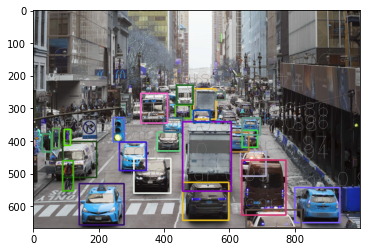

In [20]:
plt.imshow(image)
plt.show()